In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [32]:
df=pd.read_csv(r"D:\Big data analysis\input_data.csv")

In [33]:
pd.set_option('display.max_columns', None)

# Show first 10 rows
print(df.head(10))

   MONTH  DAY_OF_MONTH     FL_DATE MKT_CARRIER OP_CARRIER ORIGIN DEST  \
0      1             2  2023-01-02          G4         G4    MSP  SRQ   
1      1             2  2023-01-02          G4         G4    IAD  SRQ   
2      1             3  2023-01-03          G4         G4    BOS  SRQ   
3      1             5  2023-01-05          G4         G4    MSP  SRQ   
4      1             9  2023-01-09          G4         G4    BOS  SRQ   
5      1             9  2023-01-09          G4         G4    IND  SRQ   
6      1            12  2023-01-12          G4         G4    MSP  SRQ   
7      1            20  2023-01-20          G4         G4    BOS  SRQ   
8      1            20  2023-01-20          G4         G4    IND  SRQ   
9      1            23  2023-01-23          G4         G4    BOS  SRQ   

   DEP_DELAY  DEP_DELAY_NEW  DEP_DEL15  ARR_DELAY  ARR_DELAY_NEW  ARR_DEL15  \
0         -5            0.0        0.0      -14.0            0.0        0.0   
1        247          247.0        1.0

In [34]:
df.shape

(5559465, 56)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559465 entries, 0 to 5559464
Data columns (total 56 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   MONTH                                   int64  
 1   DAY_OF_MONTH                            int64  
 2   FL_DATE                                 object 
 3   MKT_CARRIER                             object 
 4   OP_CARRIER                              object 
 5   ORIGIN                                  object 
 6   DEST                                    object 
 7   DEP_DELAY                               int64  
 8   DEP_DELAY_NEW                           float64
 9   DEP_DEL15                               float64
 10  ARR_DELAY                               float64
 11  ARR_DELAY_NEW                           float64
 12  ARR_DEL15                               float64
 13  CRS_ELAPSED_TIME                        float64
 14  ACTUAL_ELAPSED_TIME               

In [36]:
df["DELAY"] = ((df["ARR_DEL15"] == 1) | (df["DEP_DEL15"] == 1)).astype(int)

# Check distribution
print("✅ Delay distribution:\n", df["DELAY"].value_counts())
print("✅ Percentage:\n", df["DELAY"].value_counts(normalize=True))

✅ Delay distribution:
 DELAY
0    4147494
1    1411971
Name: count, dtype: int64
✅ Percentage:
 DELAY
0    0.746024
1    0.253976
Name: proportion, dtype: float64


In [37]:
leakage_cols = [
    "DEP_DELAY", "DEP_DELAY_NEW", "DEP_DEL15",
    "ARR_DELAY", "ARR_DELAY_NEW", "ARR_DEL15",
    "ACTUAL_ELAPSED_TIME", "AIR_TIME",
    "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY",
    "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY",
    "Actual_ARR_dt_Ori", "Actual_DEP_dt_EST",
    "Actual_ARR_dt_EST", "Actual_ARR_dt_Local"
]

In [38]:
df = df.drop(columns=[col for col in leakage_cols if col in df.columns], errors="ignore")

In [39]:
date_cols = [
    "FL_DATE", "Scheduled_DEP", "Scheduled_ARR_Ori",
    "Scheduled_DEP_EST", "Scheduled_ARR_EST",
    "Scheduled_ARR_Local"
]

In [40]:
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

In [41]:
if "Scheduled_DEP" in df.columns:
    df["sched_dep_hour"] = df["Scheduled_DEP"].dt.hour
    df["sched_dep_day"] = df["Scheduled_DEP"].dt.day
    df["sched_dep_month"] = df["Scheduled_DEP"].dt.month
    df["sched_dep_dow"] = df["Scheduled_DEP"].dt.dayofweek

In [42]:
import numpy as np

In [43]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Object NaNs → "Unknown"
obj_cols = df.select_dtypes(include="object").columns
df[obj_cols] = df[obj_cols].fillna("Unknown")

In [44]:
categorical_cols = ["MKT_CARRIER", "OP_CARRIER", "ORIGIN", "DEST", "FAA_class", "day_of_week"]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10488\1020293085.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="DELAY", data=df, palette="coolwarm")


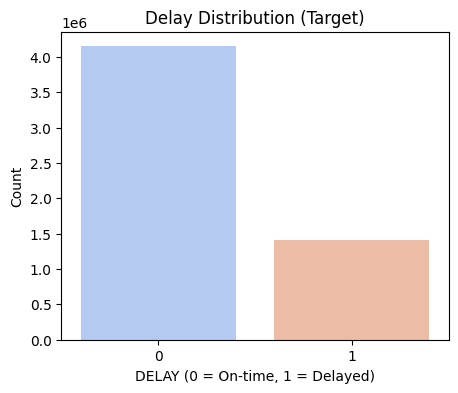

✅ Delay Rate: 25.397605704865484 %


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10488\1020293085.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="dow_name", y="DELAY", data=df, ci=None, palette="viridis")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10488\1020293085.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="dow_name", y="DELAY", data=df, ci=None, palette="viridis")


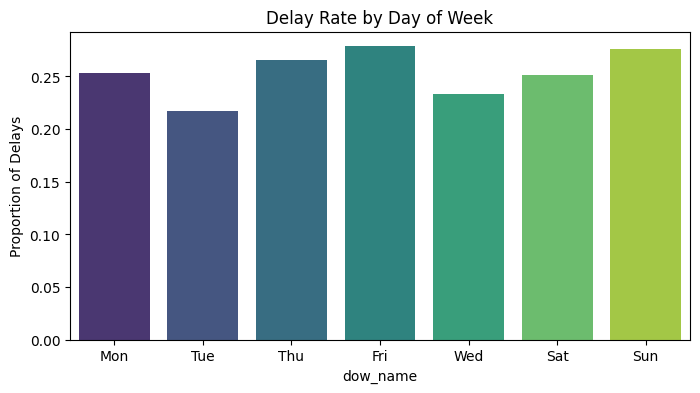

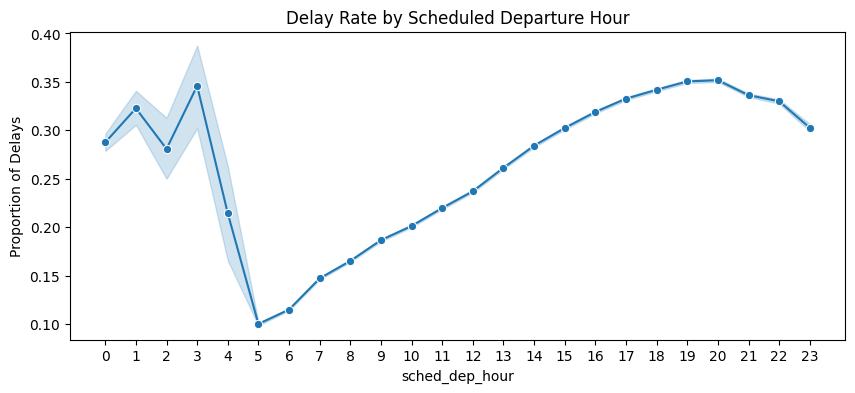

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10488\1020293085.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MKT_CARRIER", y="DELAY", data=df[df["MKT_CARRIER"].isin(top_carriers)],


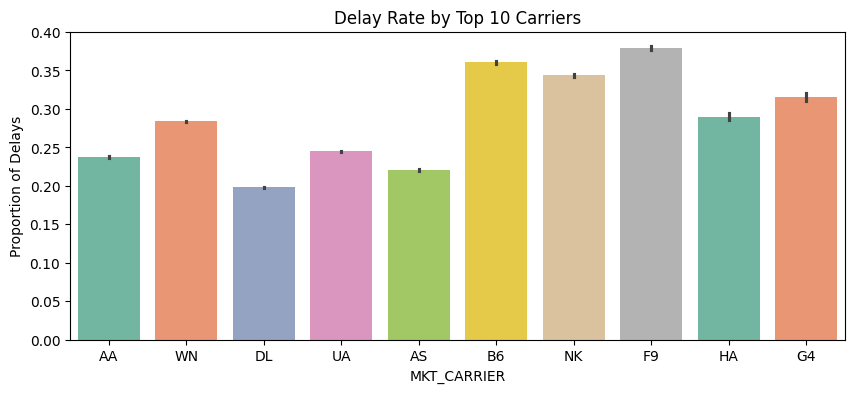

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10488\1020293085.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ORIGIN", y="DELAY", data=df[df["ORIGIN"].isin(top_airports)],


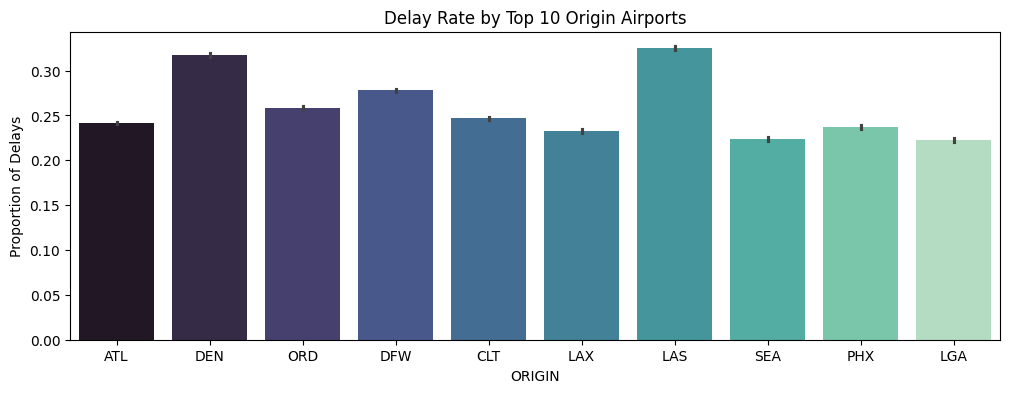

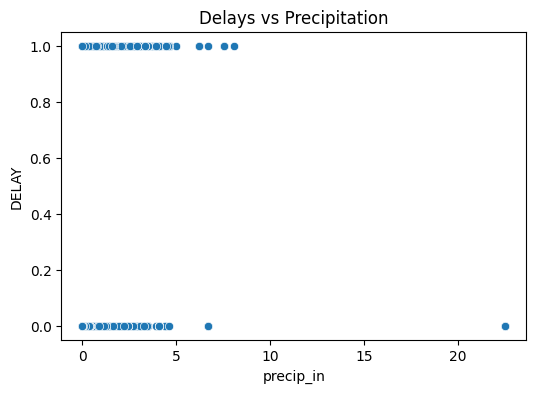

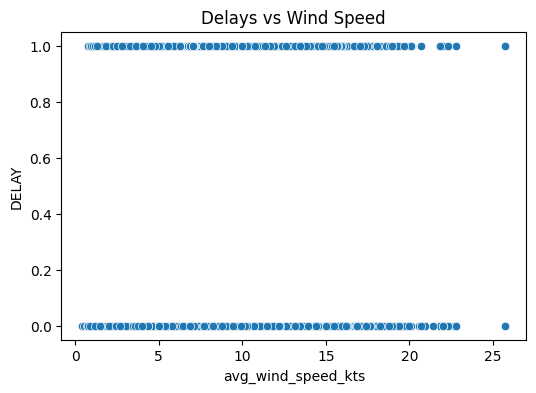

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Target Distribution
# -------------------------------
plt.figure(figsize=(5,4))
sns.countplot(x="DELAY", data=df, palette="coolwarm")
plt.title("Delay Distribution (Target)")
plt.xlabel("DELAY (0 = On-time, 1 = Delayed)")
plt.ylabel("Count")
plt.show()

print("✅ Delay Rate:", df["DELAY"].mean()*100, "%")

# -------------------------------
# 2. Delay rate by Day of Week
# -------------------------------
if "sched_dep_dow" in df.columns:
    dow_map = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
    df["dow_name"] = df["sched_dep_dow"].map(dow_map)

    plt.figure(figsize=(8,4))
    sns.barplot(x="dow_name", y="DELAY", data=df, ci=None, palette="viridis")
    plt.title("Delay Rate by Day of Week")
    plt.ylabel("Proportion of Delays")
    plt.show()

# -------------------------------
# 3. Delay rate by Hour of Day
# -------------------------------
if "sched_dep_hour" in df.columns:
    plt.figure(figsize=(10,4))
    sns.lineplot(x="sched_dep_hour", y="DELAY", data=df, marker="o")
    plt.title("Delay Rate by Scheduled Departure Hour")
    plt.ylabel("Proportion of Delays")
    plt.xticks(range(0,24))
    plt.show()

# -------------------------------
# 4. Delay rate by Airline
# -------------------------------
if "MKT_CARRIER" in df.columns:
    top_carriers = df["MKT_CARRIER"].value_counts().nlargest(10).index
    plt.figure(figsize=(10,4))
    sns.barplot(x="MKT_CARRIER", y="DELAY", data=df[df["MKT_CARRIER"].isin(top_carriers)],
                order=top_carriers, palette="Set2")
    plt.title("Delay Rate by Top 10 Carriers")
    plt.ylabel("Proportion of Delays")
    plt.show()

# -------------------------------
# 5. Delay rate by Origin Airport
# -------------------------------
if "ORIGIN" in df.columns:
    top_airports = df["ORIGIN"].value_counts().nlargest(10).index
    plt.figure(figsize=(12,4))
    sns.barplot(x="ORIGIN", y="DELAY", data=df[df["ORIGIN"].isin(top_airports)],
                order=top_airports, palette="mako")
    plt.title("Delay Rate by Top 10 Origin Airports")
    plt.ylabel("Proportion of Delays")
    plt.show()

# -------------------------------
# 6. Weather Influence
# -------------------------------
if "precip_in" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="precip_in", y="DELAY", data=df.sample(50000))  # sample for speed
    plt.title("Delays vs Precipitation")
    plt.show()

if "avg_wind_speed_kts" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="avg_wind_speed_kts", y="DELAY", data=df.sample(50000))
    plt.title("Delays vs Wind Speed")
    plt.show()


In [46]:
def dep_time_bucket(hour):
    if 5 <= hour < 12: 
        return "Morning"
    elif 12 <= hour < 17: 
        return "Afternoon"
    elif 17 <= hour < 22: 
        return "Evening"
    else: 
        return "Night"

if "sched_dep_hour" in df.columns:
    df["dep_period"] = df["sched_dep_hour"].apply(dep_time_bucket)

In [47]:
if "FL_DATE" in df.columns:
    df = df.sort_values(["ORIGIN", "FL_DATE"])

    df["origin_delay_rate_day"] = (
        df.groupby("ORIGIN")["DELAY"]
        .transform(lambda x: x.shift().rolling(window=10, min_periods=1).mean())
    )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10488\3733255472.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("ORIGIN")["DELAY"]


In [48]:
if "MKT_CARRIER" in df.columns:
    df = df.sort_values(["MKT_CARRIER", "FL_DATE"])
    
    df["carrier_delay_rate_day"] = (
        df.groupby("MKT_CARRIER")["DELAY"]
        .transform(lambda x: x.shift().rolling(window=10, min_periods=1).mean())
    )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10488\1885697533.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("MKT_CARRIER")["DELAY"]


In [49]:
# 3. Weather bins
# -------------------------------
if "snow_in" in df.columns:
    df["snow_flag"] = (df["snow_in"] > 0).astype(int)

if "precip_in" in df.columns:
    df["rain_flag"] = (df["precip_in"] > 0.5).astype(int)

if "avg_wind_speed_kts" in df.columns:
    df["windy_flag"] = (df["avg_wind_speed_kts"] > 15).astype(int)

In [50]:
if "Diff_in_turnarnd" in df.columns:
    df["turnaround_pressure"] = np.where(df["Diff_in_turnarnd"] < 0, 1, 0)

# already have: longTurnaround, affected_turnaround_lessthanXXX
# → keep them, but we can aggregate into a single flag
affected_cols = [
    "affected_turnaround_lessthan120",
    "affected_turnaround_lessthan90",
    "affected_turnaround_lessthan60",
    "affected_turnaround_lessthan45"
]

In [51]:
for col in affected_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)

df["any_turnaround_issue"] = df[affected_cols].max(axis=1)

In [52]:
print("New engineered features:\n", 
      ["dep_period", "origin_delay_rate_day", "carrier_delay_rate_day", 
       "snow_flag", "rain_flag", "windy_flag", "turnaround_pressure", "any_turnaround_issue"])
print(df[["dep_period","origin_delay_rate_day","carrier_delay_rate_day",
          "snow_flag","rain_flag","windy_flag","turnaround_pressure","any_turnaround_issue"]].head(10))

New engineered features:
 ['dep_period', 'origin_delay_rate_day', 'carrier_delay_rate_day', 'snow_flag', 'rain_flag', 'windy_flag', 'turnaround_pressure', 'any_turnaround_issue']
        dep_period  origin_delay_rate_day  carrier_delay_rate_day  snow_flag  \
489157   Afternoon                    0.6                     NaN          0   
1017451  Afternoon                    0.5                0.000000          0   
2427381    Evening                    0.2                0.000000          0   
2451147    Morning                    0.3                0.333333          0   
2456643  Afternoon                    0.4                0.500000          0   
3576865    Evening                    0.7                0.600000          0   
4736083    Morning                    0.3                0.500000          0   
4904372    Morning                    0.3                0.428571          0   
5099457    Morning                    0.1                0.375000          0   
5151258  Afternoon   

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Recalculate columns from X
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Numeric imputer
num_imputer = SimpleImputer(strategy="median")

# Categorical encoder (sparse, memory-friendly)
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_imputer, num_cols),
        ("cat", cat_encoder, cat_cols)
    ]
)

# Fit-transform
X_encoded = preprocessor.fit_transform(X)
print("✅ Features shape after encoding & imputation:", X_encoded.shape)


✅ Features shape after encoding & imputation: (4, 7)


In [55]:
# Sample 1M rows to reduce memory
sample_idx = np.random.choice(X_encoded.shape[0], size=1000000, replace=False)
X_sample = X_encoded[sample_idx]
y_sample = y.iloc[sample_idx]


ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("✅ Training set balanced:", y_train_bal.value_counts())


KeyboardInterrupt: 

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Create LightGBM datasets
# -------------------------------
train_data = lgb.Dataset(X_train_bal, label=y_train_bal)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# -------------------------------
# 2. Set LightGBM parameters
# -------------------------------
params = {
    "objective": "binary",
    "metric": ["binary_logloss", "auc"],
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1,
    "n_jobs": -1,
    "seed": 42
}

# -------------------------------
# 3. Train the model
# -------------------------------
print("⏳ Training LightGBM...")
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data],
    early_stopping_rounds=50,
    verbose_eval=50
)

# -------------------------------
# 4. Make predictions
# -------------------------------
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_pred_prob >= 0.5).astype(int)

# -------------------------------
# 5. Evaluate model
# -------------------------------
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ ROC-AUC: {roc:.4f}")
print("✅ Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------
# 6. Feature importance
# -------------------------------
importance = model.feature_importance(importance_type="gain")
feature_names = preprocessor.get_feature_names_out()
sorted_idx = np.argsort(importance)[-20:]  # top 20 features

plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance (gain)")
plt.title("Top 20 LightGBM Features")
plt.show()
